## Intro

- LU분해는 QR분해와 같이 최소제곱 모델 적합과 열행렬 등 데이터 과학 알고리즘의 근간이 되는 연산

## 9.1 연립방정식

### 9.1.1 연립방정식을 행렬로 변환하기

1. 계수 정리
2. 상수 정리

$x=4-y$  
$y=x/2+2$

$x+y=4$  
$-x/2+y=2$

<img src='images/fig_09_01.png' width = 300>

### 9.1.2 행렬 방정식 다루기

행렬을 곱할 때 양쪽에서 같은 방향으로 행렬을 곱해야 한다  

$AX=B$  
$CAX=CB$

solve for $X$  
$AX=B$  
1) $A^{-1}AX = A^{-1}B$  
2) $A^{-1}AX = BA^{-1}$  

In [1]:
import numpy as np

# generate some matrices
A = np.random.randn(4,4)
B = np.random.randn(4,4)

# solve for X
# 1) inv(A)@A@X = inv(A)@B
# 2) inv(A)@A@X = B@inv(A)

X1 = np.linalg.inv(A) @ B
X2 = B @ np.linalg.inv(A)

# residual (should be zeros matrix)
res1 = A@X1 - B
res2 = A@X2 - B

# which is correct?
print('res1:'), print(' ')
print( np.round(res1,10) ), print(' ')

print('res2:'), print(' ')
print( np.round(res2,10) )

res1:
 
[[-0.  0.  0.  0.]
 [ 0. -0. -0. -0.]
 [-0.  0. -0. -0.]
 [-0. -0. -0. -0.]]
 
res2:
 
[[-1.91183596  1.47567117 -1.04000418 -2.3702092 ]
 [ 2.27562805 -0.6960302   0.04925936  2.38308409]
 [-1.74891758 -0.05146413 -0.43233019 -0.58526088]
 [-0.0718625  -2.5778537   0.79178607  3.04019635]]


## 9.2 행 축소

행 축소의 목표는 밀집 행렬을 상삼감 행렬로 변환하는 것입니다

<img src='images/fig_09_02.png' width = 300>

행렬 곱셈을 사용해 행 축소를 표현할 수 있습니다

<img src='images/fig_09_03.png' width = 400>

행 축소는 행 조작을 통해 행렬을 상삼각 행렬로 변환하는 작업이며, 이는 변환 행렬을 좌측에서 곱해서 구할 수 있습니다

## 9.2.1 가우스 소거법

역행렬을 구하지 않고 행렬방정식을 푸는 방법  
- 행축소를 이용하여 행렬 방정식 풀기

<img src='images/fig_09_04.png' width = 1000>    

## 9.2.2 가우스-조던 소거법

- RREF 기약 행 사다리꼴 형태를 이용하여 행렬 방정식 풀기

<img src='images/fig_09_05.png' width = 1000>    

In [2]:
# sympy library for RREF
import numpy as np
import sympy as sym

# the augmented matrix
M = np.array([ [1,1,4],[-1/2,1,2] ])
print(M)

# converted into a sympy matrix
symMat = sym.Matrix(M)
print(symMat)

# RREF
symMat.rref()[0] # just the first output to get the RREF matrix (the second output is the indices of the pivots per row)

[[ 1.   1.   4. ]
 [-0.5  1.   2. ]]
Matrix([[1.00000000000000, 1.00000000000000, 4.00000000000000], [-0.500000000000000, 1.00000000000000, 2.00000000000000]])


Matrix([
[1, 0, 1.33333333333333],
[0, 1, 2.66666666666667]])

## 9.2.3 가우스-조던 소거법을 통한 역행렬 계산

가우스-조던 소거법의 핵심은 행축소라는 일련의 행 조작을 통해 연립방정식을 풀 수 있다는 것입니다.  
흥미롭게도 가우스-조던 소거법에 대한 내용은 역행렬을 구하는 방법, 즉 연립방정식을 푸는 선형 변환에 대한 설명과 일치합니다.


가우스-조던 소거법을 이용한 역행렬 구하는 방법  

- $rref([A | I])=[I | A^{-1}]$  



- 행렬식을 계산하지 않고 역행렬을 계산
- 행축소(RREF)는 많은 나눗셈이 필요하므로 그만큼 수치 정밀도 오차가 발생할 위험이 높아집니다.
- 10^-15 / 10^-16 = 10

<img src='images/fig_09_06.png' width = 1000>    

## 9.3 LU 분해

- $A=LU$  

- 행 축소는 $L^{-1}A=U$로 표현할 수 있으며  
- 여기서 $L^{-1}$에는 밀집 행렬 $A$를 상삼각(사다리꼴)행렬 $U$로 변환하는 행 변환 집합을 담고 있습니다.

In [3]:
import numpy as np
import scipy.linalg
# simple example with integers

# a matrix
A = np.array([ [1,1,1], [2,3,-1], [2,3,3] ])
A

array([[ 1,  1,  1],
       [ 2,  3, -1],
       [ 2,  3,  3]])

행 축소는 $L^{-1}A=U$  
<img src='images/fig_09_07.png' width = 1000>    

In [4]:
i1 = np.array([1,0,0])
i2 = np.array([0,1,0])
i3 = np.array([0,0,1])
I = np.array([i1,
              i2,
              i3])

In [5]:
r21 = np.array([i1,
                i2-2*i1,
                i3])
r31 = np.array([i1,
                i2,
                i3-2*i1])
r32 = np.array([i1,
                i2,
                i3-1*i2])

print('r21: '), print(r21), print('  ')
print('r31: '), print(r31), print('  ')
print('r32: '), print(r32), print('  ')
U = r32@r31@r21@A
print('U: '), print(U), print('  ')

r21: 
[[ 1  0  0]
 [-2  1  0]
 [ 0  0  1]]
  
r31: 
[[ 1  0  0]
 [ 0  1  0]
 [-2  0  1]]
  
r32: 
[[ 1  0  0]
 [ 0  1  0]
 [ 0 -1  1]]
  
U: 
[[ 1  1  1]
 [ 0  1 -3]
 [ 0  0  4]]
  


(None, None, None)

기본 행렬의 역행렬 곱해주기  
<img src='images/fig_09_08.png' width = 1000>    

기본 행렬의 역행렬 공식  
<img src='images/fig_09_09.png' width = 1000>    

$A=LU$  
<img src='images/fig_09_10.png' width = 1000>    

In [6]:
import numpy as np
import scipy.linalg

# simple example with integers

# a matrix
A = np.array([ [2,2,4], [1,0,3], [2,1,2] ])
print('A: ')
print(A), print(' ')

# its LU decomposition via scipy (please ignore the first output for now)
_,L,U = scipy.linalg.lu(A)

# print them out
print('L: ')
print(L), print(' ')

print('U: ')
print(U), print(' ')

print('A - LU: ')
print(A - L@U) # should be zeros

A: 
[[2 2 4]
 [1 0 3]
 [2 1 2]]
 
L: 
[[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.  1.  1. ]]
 
U: 
[[ 2.  2.  4.]
 [ 0. -1.  1.]
 [ 0.  0. -3.]]
 
A - LU: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### 9.3.1 치환 행렬을 통한 행 교환

$PA=LU$  
$A=P^{T}LU$ 
 

<img src='images/fig_09_11.png' width = 1000>    

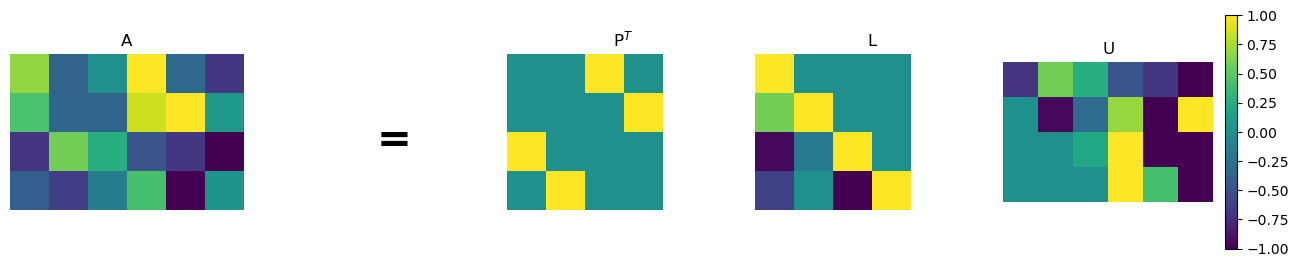

In [7]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# matrix sizes
m = 4
n = 6

A = np.random.randn(m,n)

P,L,U = scipy.linalg.lu(A)

# show the matrices
fig,axs = plt.subplots(1,5,figsize=(13,4))

axs[0].imshow(A,vmin=-1,vmax=1)
axs[0].set_title('A')

axs[1].imshow(np.ones((m,n)),cmap='gray',vmin=-1,vmax=1)
axs[1].text(n/2,m/2,'=',ha='center',fontsize=30,fontweight='bold')
# axs[1].axis('off')

axs[2].imshow(P.T,vmin=-1,vmax=1)
axs[2].set_title(r'P$^T$')

axs[3].imshow(L,vmin=-1,vmax=1)
axs[3].set_title('L')

h = axs[4].imshow(U,vmin=-1,vmax=1)
axs[4].set_title('U')

for a in axs:
  a.axis('off')
  a.set_xlim([-.5,n-.5])
  a.set_ylim([m-.5,-.5])


fig.colorbar(h,ax=axs[-1],fraction=.05)
plt.tight_layout()
plt.savefig('Figure_09_01.png',dpi=300)
plt.show()

## 9.4 정리

- 연립방정식은 행렬 방정식으로 변환
- 행렬 곱셈은 교환법칙 성립 안함
- 행축소란 행렬 A의 행에 스칼라를 곱하고 더하는 방식으로, 행렬을 상삼각행렬 U로 선형변환하는 과정
- 선형변환 집합은 $L^{-1}A=U$ 식에서 A의 왼쪽에 곱하는 행렬 $L^{-1}$에 저장할 수 있다
- 행 축소는 LU분해를 구현하는 데에도 사용됩니다. LU분해는 몇가지 제약조건하에서 고유하며, 이 제약조건은
SciPy의 lu() 함수에 내장되어 있습니다. 

## 연습문제

### 연습문제 9-1

LU분해 연산시간 테스트

In [8]:
# Time-test!

import time

# start the timer
tic = time.time()

# run the test
for i in range(1000):
  A = np.random.randn(100,100)
  P,L,U = scipy.linalg.lu(A)

# stop the timer
toc = time.time() - tic
toc # print the result in seconds

0.4020397663116455

### 연습문제 9-2

행렬곱셈을 이용해 계수-3dml 6X8 행렬을 만듭니다.  
LU분해 결과의 세 행렬을 행렬의 계수와 함께 제목에 표시합니다.  
세 행렬의 계수를 살펴보고, L의 대각선에 모두 1이 존재함을 주목하세요.  
다른 크기와 계수를 갖는 행렬에 대해서 계수를 자유롭게 탐색해 보세요.  

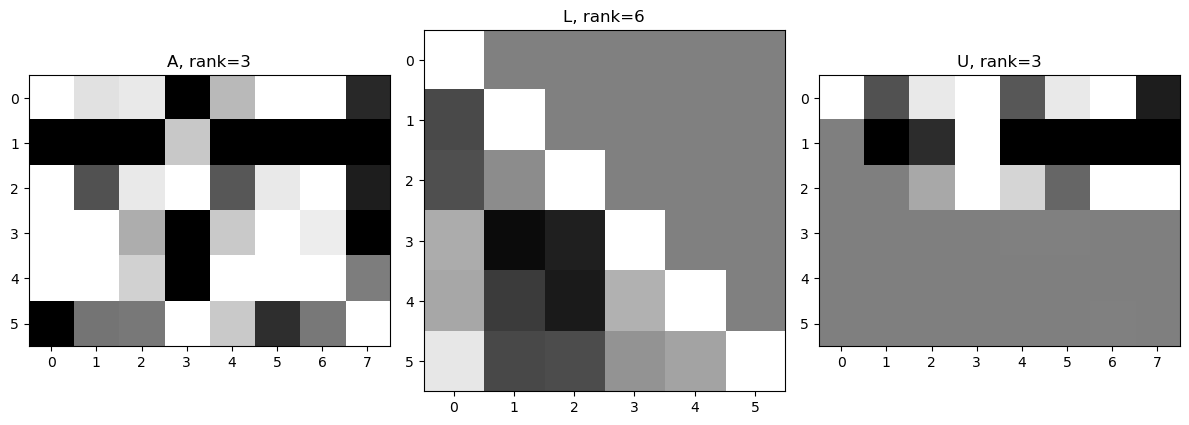

In [9]:
# make a reduced-rank random matrix

# sizes and rank
M = 6
N = 8
r = 3

# create the matrix
A = np.random.randn(M,r) @ np.random.randn(r,N)

# LU
P,L,U = scipy.linalg.lu(A)

# and plot
_,axs = plt.subplots(1,3,figsize=(12,7))

axs[0].imshow(A,vmin=-1,vmax=1,cmap='gray')
axs[0].set_title(f'A, rank={np.linalg.matrix_rank(A)}')

axs[1].imshow(L,vmin=-1,vmax=1,cmap='gray')
axs[1].set_title(f'L, rank={np.linalg.matrix_rank(L)}')

axs[2].imshow(U,vmin=-1,vmax=1,cmap='gray')
axs[2].set_title(f'U, rank={np.linalg.matrix_rank(U)}')

plt.tight_layout()
plt.savefig('Figure_09_02.png',dpi=300)
plt.show()

### 연습문제 9-3

LU분해를 활용하면 행렬식을 계산할 수 있습니다.  
- det(A) = det(L) * det(U) = det(U)  

In [10]:
# a matrix and its det
M = 6
A = np.random.randn(M,M)

# LU
P,L,U = scipy.linalg.lu(A)

# determinant as the product of the diagonals of U
detLU = np.prod( np.diag(U) )

print('det(A) = ',np.linalg.det(A))
print('det(LU) = ',detLU)

det(A) =  -3.4796138770573757
det(LU) =  3.479613877057377


- det(A) = det(P) * det(L) * det(U) = det(P) * det(U)

In [11]:
# a matrix and its det
M = 6
A = np.random.randn(M,M)

# LU
P,L,U = scipy.linalg.lu(A)

# determinant as the product of the diagonals of U
detLU = np.prod( np.diag(U) ) * np.linalg.det(P)

# check against the det function
detNP = np.linalg.det(A)

# compare
print(detLU,detNP)
print(detLU-detNP)

-51.61356664573379 -51.61356664573381
2.1316282072803006e-14


### 연습문제 9-4

$A=P^{T}LU$  
$A^{-1}=(P^{T}LU)^{-1}$  
$A^{-1}=U^{-1}L^{-1}P$

4X4 난수 행렬에 대해 scipy.linalg.lu을 호출한 결과를 사용해 세번째 방정식을 직접
구현해 봅니다.  
$AA^{-1}$는 단위행렬인가요?

In [12]:
# matrix sizes
m = 4
A = np.random.randn(m,m)

# LU decomposition
P,L,U = scipy.linalg.lu(A)

# inverse
invViaLU = np.linalg.inv(U) @ np.linalg.inv(L) @ P.T

# "regular" inverse
invViaInv = np.linalg.inv(A)

np.round( A@invViaLU ,10)

array([[ 1.,  0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -0.],
       [ 0., -0., -0.,  1.]])

### 연습문제 9-5

행렬 $A=PLU$에서 치환 행렬을 사용하지 않고도 $A^{T}A$를 $U^{T}L^{T}LU$로 계산 할 수 있습니다.  
치환 행렬을 삭제할 수 있는 이유는 무엇인가요?  
$A^{T}A = U^{T}L^{T}LU$

<img src='images/fig_09_12.png' width = 500>   

In [13]:
# The reason is that writing out the equation leads to PtP in the middle, which is the identity matrix. 
# Conceptually, it means that any row swaps are undone when multiplying by the transpose.

# create a matrix
A = np.random.randn(4,4)

# LUP
P,L,U = scipy.linalg.lu(A)

# compute AtA via LU
AtA_lu = U.T @ L.T @ L @ U

# direct computation
AtA_direct = A.T @ A

# compare to direct computation
np.round( AtA_lu - AtA_direct ,10)

array([[ 0.,  0.,  0., -0.],
       [ 0.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.]])